<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/partialPeriodicFrequentPattern/basic/PPF_DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Partial Periodic Frequent Patterns in Temporal Databases using PPF_DFS

This tutorial has two parts. In the first part, we describe the basic approach to find partial periodic frequent patterns in a temporal database using the PPF_DFS algorithm. In the final part, we describe an advanced approach, where we evaluate the PPF_DFS algorithm on a dataset at different minimum support threshold values.
***

# Prerequisites:

1.   Installing the PAMI library

In [1]:
!pip install -U pami #install the pami repository

2.   Downloading a sample dataset

In [2]:
!wget -nc https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv #download a sample temporal database

--2023-08-28 07:02:46--  https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.31.244.160, 150.95.161.176
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.31.244.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606762 (4.4M) [text/csv]
Saving to: ‘Temporal_T10I4D100K.csv’

Temporal_T10I4D100K 100%[===================>]   4.39M  1.08MB/s    in 6.3s    

2023-08-28 07:02:55 (713 KB/s) - ‘Temporal_T10I4D100K.csv’ saved [4606762/4606762]



3.   Printing few lines of a dataset to know its format.

In [3]:
!head -2 Temporal_T10I4D100K.csv

1	25	52	164	240	274	328	368	448	538	561	630	687	730	775	825	834
2	39	120	124	205	401	581	704	814	825	834


format: every row contains items seperated by a seperator.

Example:

item1 item2 item3 item4

item1 item4 item6
***

## Part 1: Finding Partial Periodic Frequent Patterns using PPF_DFS

### Step 1: Understanding the statistics of a database to choose an appropriate minimum support (minSup) value.

In [4]:
#import the class file
import PAMI.extras.dbStats.temporalDatabaseStats as stats

#specify the file name
inputFile = 'Temporal_T10I4D100K.csv'

#initialize the class
obj=stats.temporalDatabaseStats(inputFile,sep='\t')

#execute the class
obj.run()

#Printing each of the database statistics
print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()}')

#saving the distribution of items' frequencies and transactional lengths
itemFrequencies = obj.getSortedListOfItemFrequencies()
transactionLength = obj.getTransanctionalLengthDistribution()
obj.save(itemFrequencies, 'itemFrequency.csv')
obj.save(transactionLength, 'transactionSize.csv')

#Alternative apporach to print all of the database statistics and plot them
# obj.printStats()
# obj.plotGraphs()

Database size : 99913
Total number of items : 870
Database sparsity : 0.9883887027691103
Minimum Transaction Size : 1
Average Transaction Size : 10.10182859087406
Maximum Transaction Size : 29
Standard Deviation Transaction Size : 3.667115963877195
Variance in Transaction Sizes : 13.447874088362232


### Step 2: Draw the item's frequency graph and transaction length's distribution graphs for more information

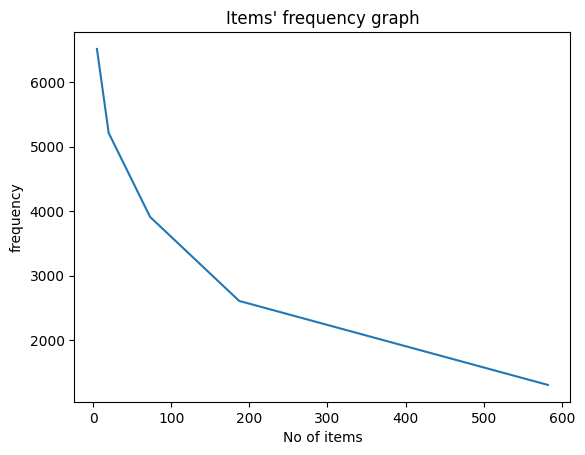

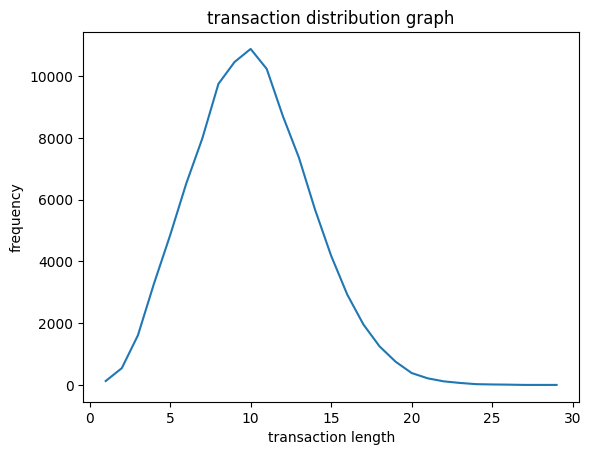

In [5]:
import PAMI.extras.graph.plotLineGraphFromDictionary as plt

itemFrequencies = obj.getFrequenciesInRange()
transactionLength = obj.getTransanctionalLengthDistribution()
plt.plotLineGraphFromDictionary(itemFrequencies, end = 100, title = 'Items\' frequency graph', xlabel = 'No of items', ylabel= 'frequency')
plt.plotLineGraphFromDictionary(transactionLength, end = 100, title = 'transaction distribution graph', xlabel = 'transaction length', ylabel = 'frequency')

### Step 3: Choosing an appropriate *minSup* value

_Observations_

  1. The input dataset is sparse as the sparsity value is 0.988 (=98.8%)
  2. Many items have low frequencies as seen in the items' frequency graph
  3. The dataset is not high dimensional as the inverted curve is around 10.

  Based on the above observations, let us choose a _minSup_ value of 100 (in count). We can increase or decrease the _minSup_ based on the number of patterns being generated.

In [6]:
maxPerCount = 500 #maxPerCount is specified in count. However, the users can also specify minSup between 0 and 1.
minPRcount = 0.5 #minPRcount is specified in count. However, the users can also specify different minPRcount value.
minSup=100 #minSup is specified in count. However, the users can also specify minSup between 0 and 1.

### Step 4: Mining Partial Periodic Frequent Patterns using PPF_DFS

In [7]:
from PAMI.partialPeriodicFrequentPattern.basic import PPF_DFS  as alg #import the algorithm

obj = alg.PPF_DFS(iFile=inputFile, minSup=minSup,maxPer=maxPerCount,minPR=minPRcount, sep='\t')    #initialize
obj.mine()            #start the mining process

obj.save('partialPeriodicFrequentPatternsAtMinSupCount100.txt') #save the patterns


frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Total No of patterns: 20743
Runtime: 78.65053415298462
Memory (RSS): 259076096
Memory (USS): 212385792


### Step 5: Investigating the generated patterns

Open the pattern's file and investigate the generated patterns. If the generated patterns were interesting, use them; otherwise, redo the Steps 3 and 4 with a different _minSup_ value.

In [8]:
!head partialPeriodicFrequentPatternsAtMinSupCount100.txt

352	527	319	48	676	720	529	368	595:147:0.5540540540540541
527	319	48	676	720	529	368	352:149:0.5666666666666667
527	319	48	676	720	529	368	595:148:0.5570469798657718
319	48	676	720	529	368	527:150:0.5695364238410596
352	319	48	676	720	529	368	595:150:0.5562913907284768
319	48	676	720	529	368	352:152:0.5686274509803921
319	48	676	720	529	368	595:151:0.5592105263157895
48	676	720	529	368	319:153:0.5714285714285714
352	527	48	676	720	529	368	595:149:0.5533333333333333
527	48	676	720	529	368	352:151:0.5657894736842105


The storage format is: _partialperiodicfrequentPattern:support_
***

## Part 2: Evaluating the PPF_DFS algorithm on a dataset at different minSup values

### Step 1: Import the libraries and specify the input parameters

In [9]:
#Import the libraries
from PAMI.partialPeriodicFrequentPattern.basic import PPF_DFS  as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'Temporal_T10I4D100K.csv'
seperator='\t'
maxPerCount = 500
minPRcount = 0.5
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

### Step 2: Create a data frame to store the results of PPF_DFS

In [10]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'maxperCount','minPRcount','patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PPF_DFS algorithm

### Step 3: Execute the algorithm at different minSup values

In [11]:
for minSupCount in minimumSupportCountList:
    obj = alg.PPF_DFS(inputFile, minSup=minSupCount, maxPer=maxPerCount,minPR=minPRcount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['PPF_DFS', minSupCount, maxPerCount, minPRcount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

### Step 4: Print the Result

In [12]:
print(result)

  algorithm  minSup  maxperCount  minPRcount  patterns     runtime     memory
0   PPF_DFS     100          500         0.5     20743  135.342738  275902464
1   PPF_DFS     150          500         0.5     19017  212.406846  288145408
2   PPF_DFS     200          500         0.5     13235  288.571058  300556288
3   PPF_DFS     250          500         0.5      7674  370.978486  311742464
4   PPF_DFS     300          500         0.5      4529  471.526392  323899392


### Step 5: Visualizing the results

<Axes: xlabel='minSup'>

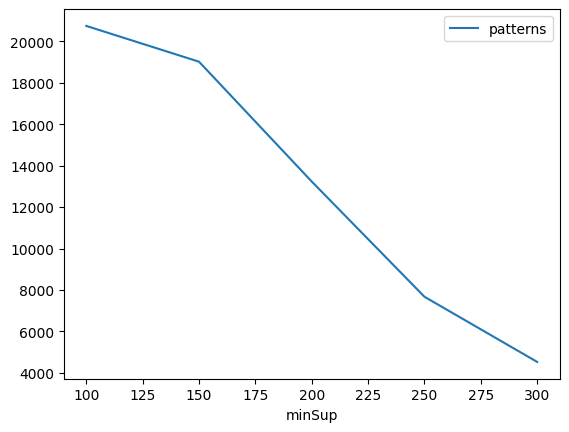

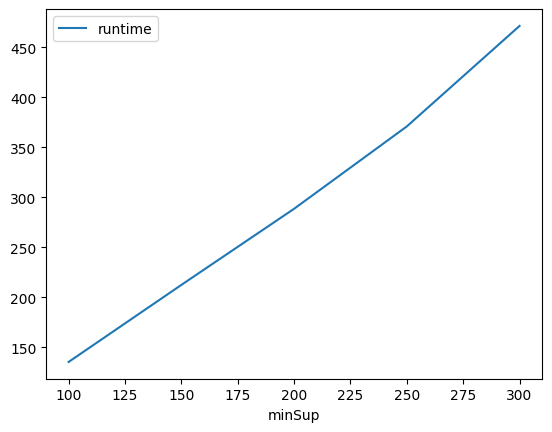

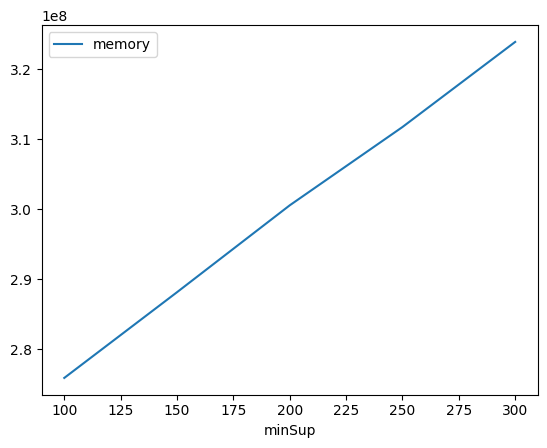

In [13]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib